## Hackathon Subject 3: Exploring Employee Attrition and Performance in a Corporate Environment

#### Import the librairies

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import xgboost as xgb


#### Understand the dataset

In [112]:
# Load the dataset
df = pd.read_csv(r"dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [113]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [114]:
print(df.shape)

(1470, 35)


In [115]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Conclusion:
- It is a small dataset
- No missing values
- 26 numeric vales
- 9 categorical values
- Target column -> Attrition

In [116]:
print (df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

#### Check the distribution of the dataset

In [117]:
# check how many employees left (Attrition = Yes) and how many employess stayed (Attrition = No)

attrition_count = df['Attrition'].value_counts()
attrition_percentage = df['Attrition'].value_counts(normalize = True) * 100

print (attrition_count)
print (attrition_percentage)

Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


Conclusion:
The dataset is highly imbalanced.

84% -> No
16% -> Yes

Hence, we must not trust the accuracy alone

In [118]:
# Check any missing values
print(df.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No missing values found

C:\Users\emmaf\AppData\Local\Temp\ipykernel_15768\3704540143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Attrition', palette = 'Set2')


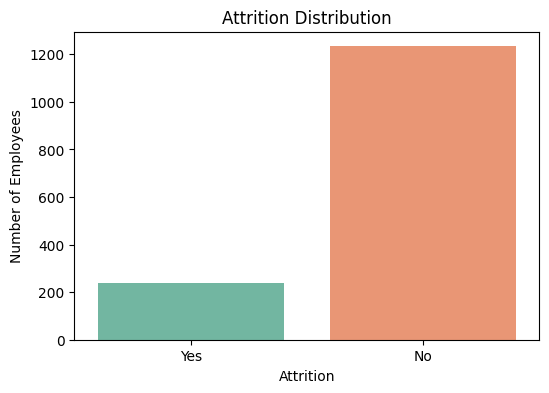

In [119]:
# Plot the counts

plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'Attrition', palette = 'Set2')
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()


#### Exploratory Data Analysis (EDA)

##### Numerical Features

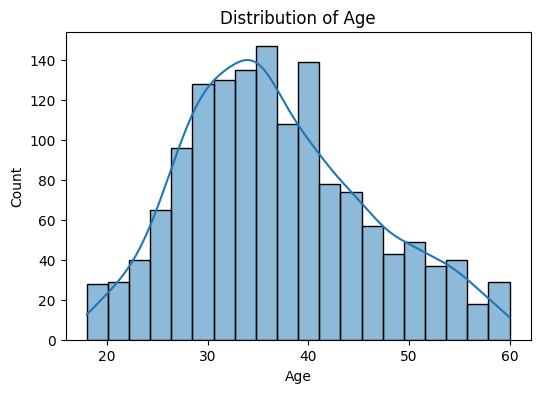

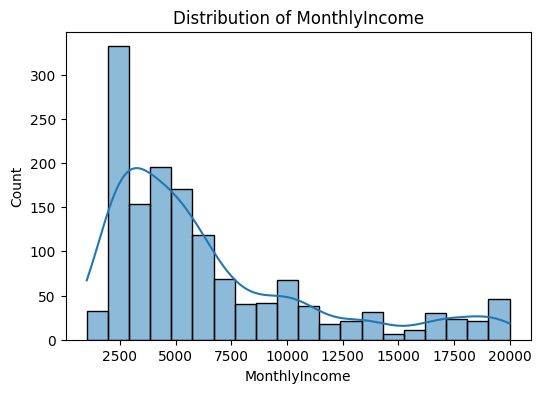

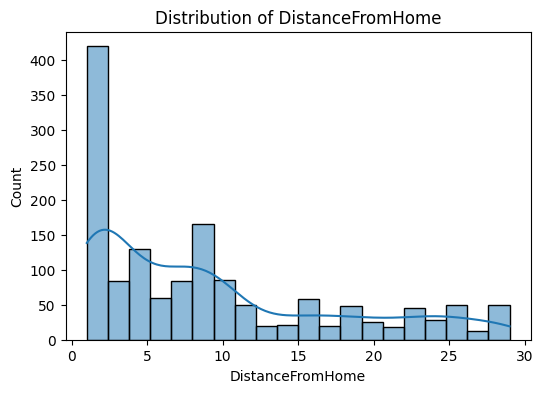

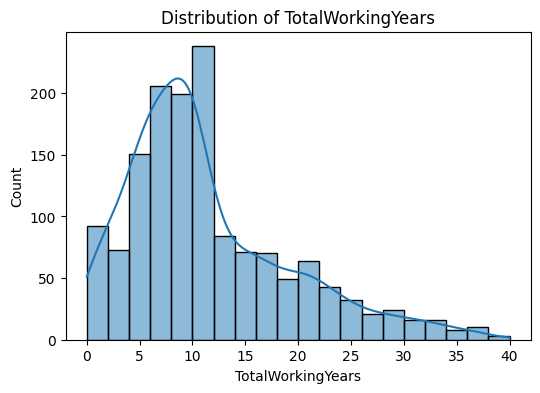

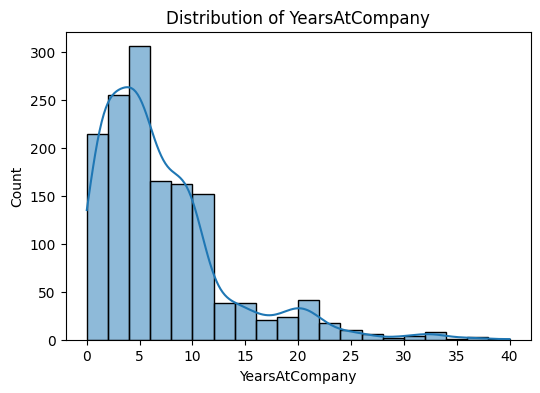

In [120]:
# Ditribution of the numeric features

numeric_features = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany']

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data = df, x = col, kde = True, bins = 20)
    plt.title(f"Distribution of {col}")
    plt.show()

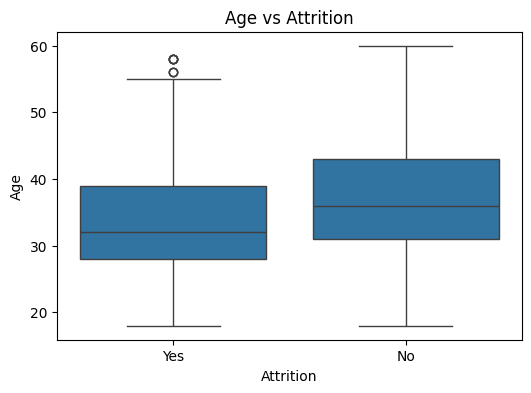

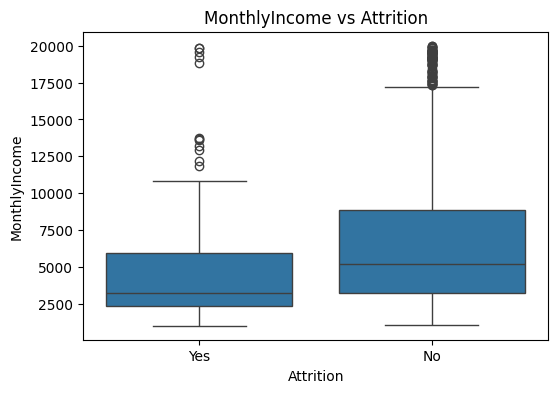

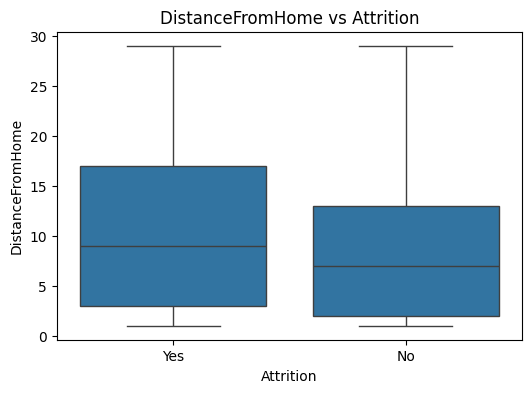

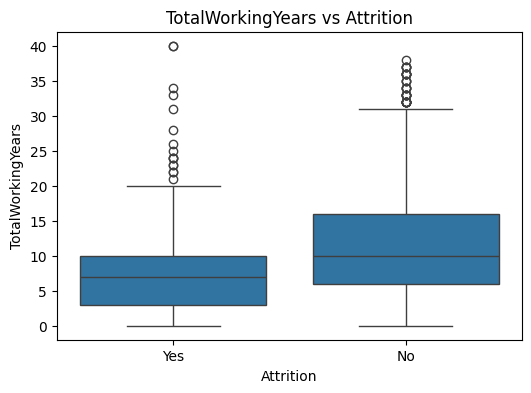

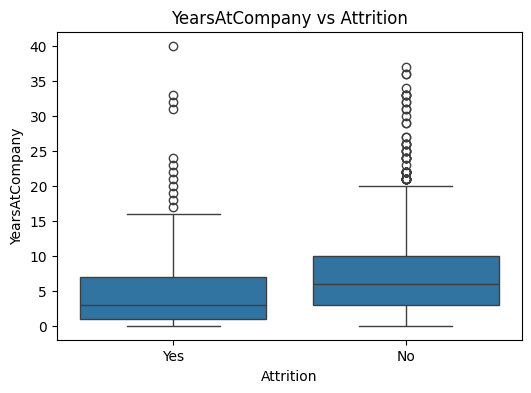

In [121]:
# Boxplots of numeric features vs Attrition

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x = 'Attrition', y = col, data = df)
    plt.title(f"{col} vs Attrition")
    plt.show()

##### Categorical Features

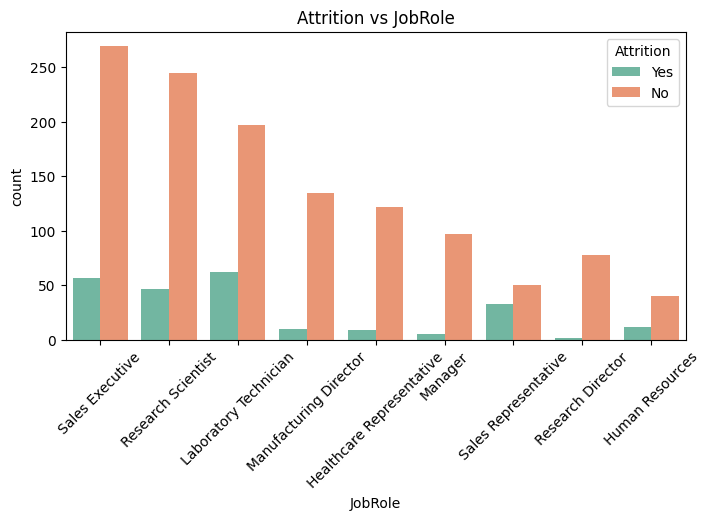

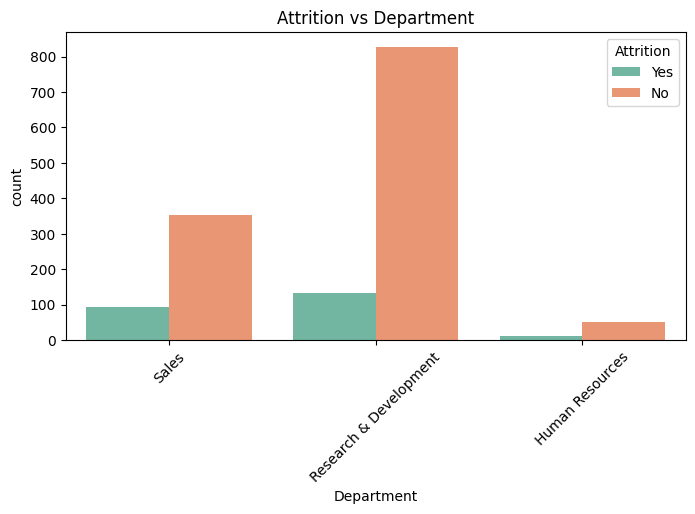

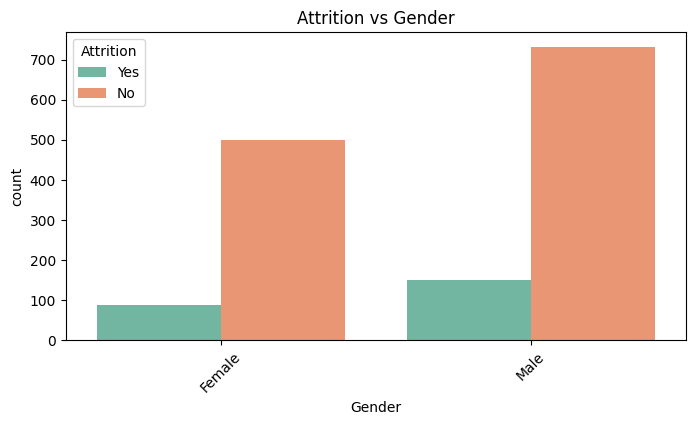

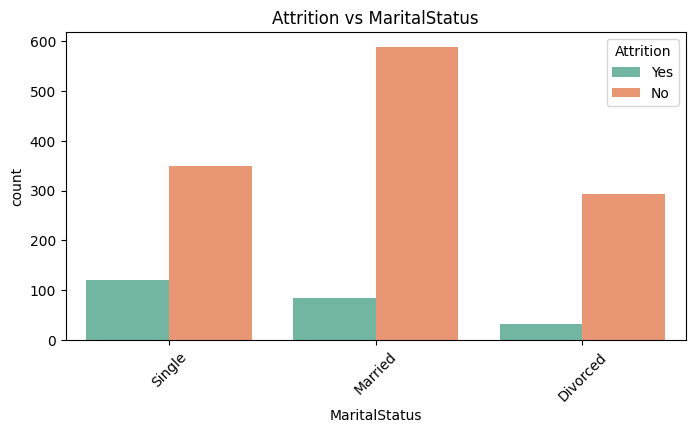

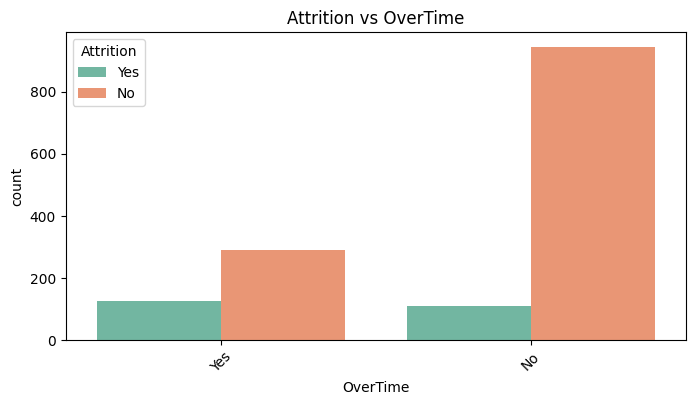

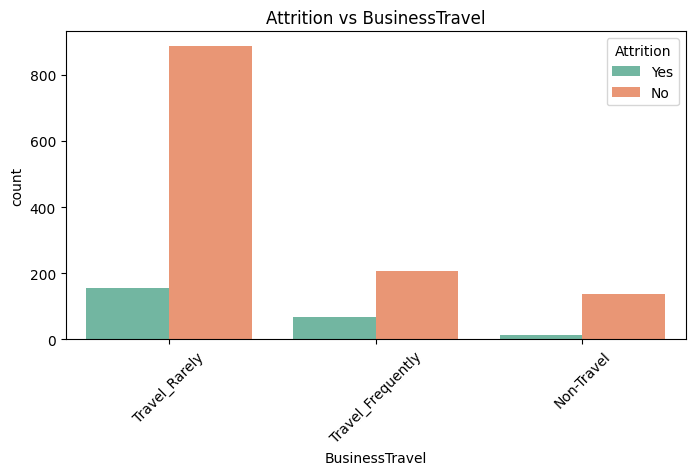

In [122]:
categorical_features = ['JobRole', 'Department', 'Gender', 'MaritalStatus', 'OverTime', 'BusinessTravel']

for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x = col, hue = 'Attrition', data = df, palette = 'Set2')
    plt.title(f"Attrition vs {col}")
    plt.xticks(rotation=45)
    plt.show()

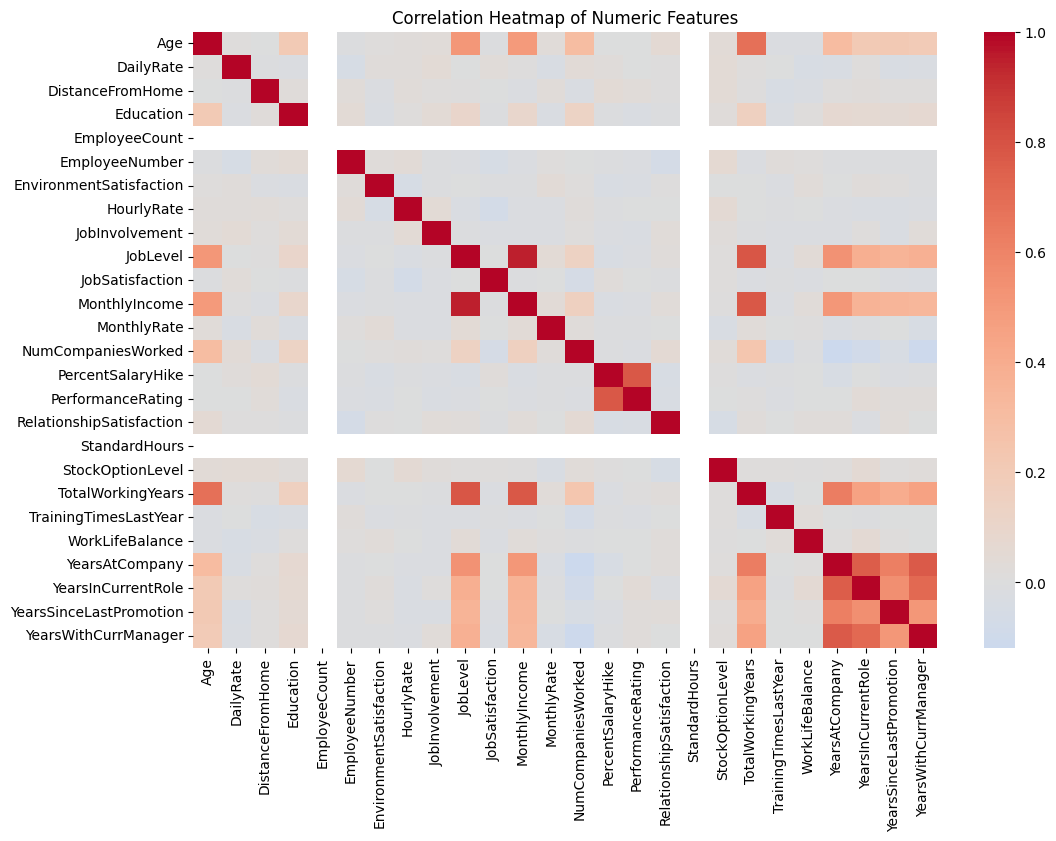

In [123]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

##### Checking for outliers

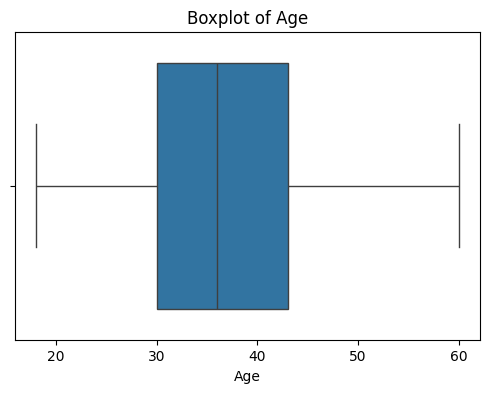

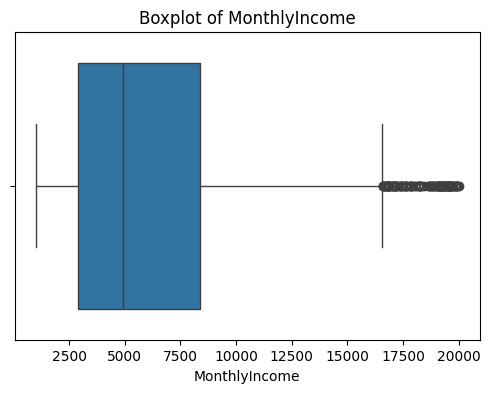

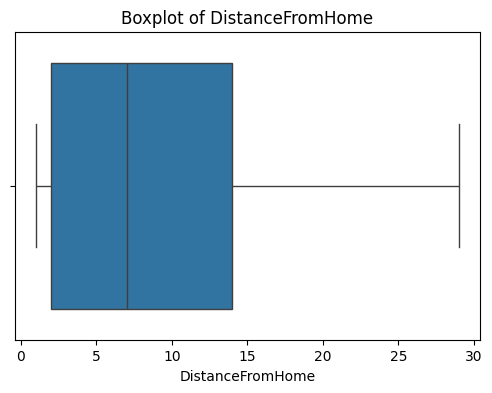

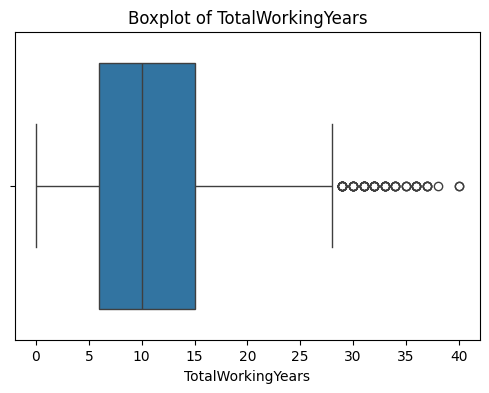

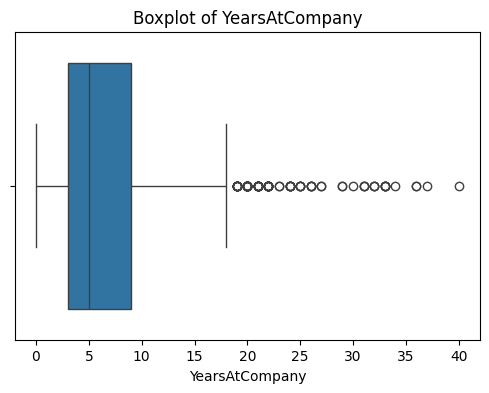

In [124]:
# Boxplots for numeric features
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

#### Data Preprocessing and Feature Engineering

In [125]:
# Convert the target column (Attrition) to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0}).astype(int)

# Drop irrelavant/ constant columns
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis = 1)

# Identify the numeric and categorical features
numeric_features = df.select_dtypes(include=['int64','float64']).drop(columns=['Attrition']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Encode categorical features using One Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Scale numeric features
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Separate features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Numeric features: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical features: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [126]:
print("Training set:", X_train.shape, "Test set:", X_test.shape)
print("Attrition ratio in training:", y_train.mean())
print("Attrition ratio in test:", y_test.mean())

Training set: (1029, 47) Test set: (441, 47)
Attrition ratio in training: 0.16132167152575316
Attrition ratio in test: 0.16099773242630386


#### Model 1: Logistic Regression

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

        Stay       0.93      0.77      0.84       370
       Leave       0.37      0.70      0.48        71

    accuracy                           0.76       441
   macro avg       0.65      0.74      0.66       441
weighted avg       0.84      0.76      0.78       441



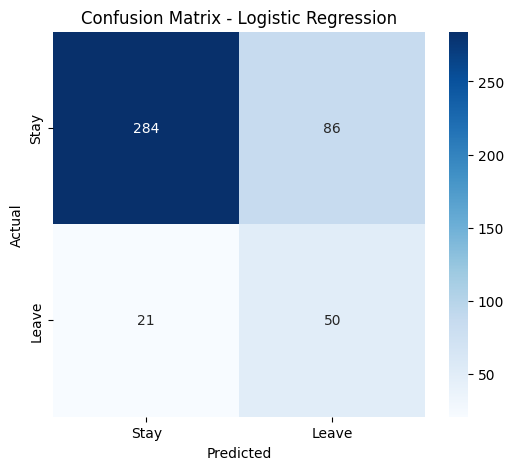

In [172]:
logistic_regression_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)
y_prob = logistic_regression_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred, target_names=['Stay','Leave']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay','Leave'], yticklabels=['Stay','Leave'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

#### Model 2 : Decision Tree

Classification Report - Decision Tree:
              precision    recall  f1-score   support

        Stay       0.87      0.89      0.88       370
       Leave       0.34      0.30      0.32        71

    accuracy                           0.79       441
   macro avg       0.60      0.59      0.60       441
weighted avg       0.78      0.79      0.79       441



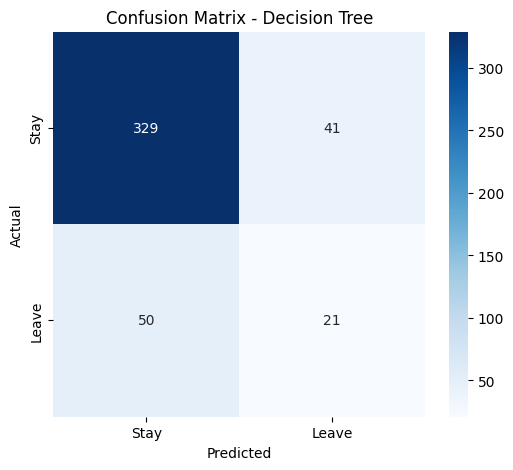

In [ ]:
decision_tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)


decision_tree_model.fit(X_train, y_train)

y_pred_dt = decision_tree_model.predict(X_test)
y_prob_dt = decision_tree_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt, target_names=['Stay','Leave']))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay','Leave'], yticklabels=['Stay','Leave'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


#### Model 3 : RandomForest

Classification Report - Random Forest:
              precision    recall  f1-score   support

        Stay       0.85      0.99      0.91       370
       Leave       0.55      0.08      0.15        71

    accuracy                           0.84       441
   macro avg       0.70      0.54      0.53       441
weighted avg       0.80      0.84      0.79       441



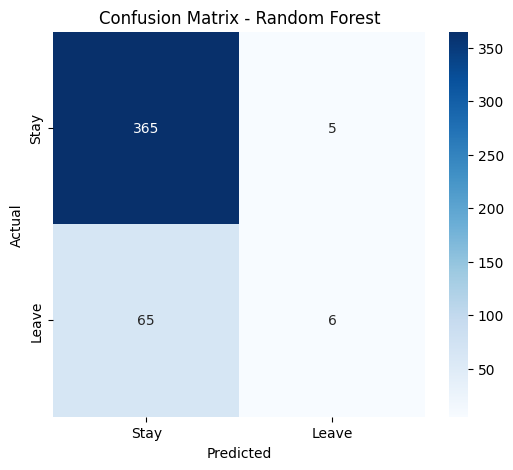

In [ ]:
random_forest_model = RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['Stay','Leave']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay','Leave'], yticklabels=['Stay','Leave'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


#### Model 4 : GradientBoosting

Classification Report - Gradient Boosting :
              precision    recall  f1-score   support

        Stay       0.87      0.96      0.92       370
       Leave       0.58      0.25      0.35        71

    accuracy                           0.85       441
   macro avg       0.73      0.61      0.63       441
weighted avg       0.82      0.85      0.82       441



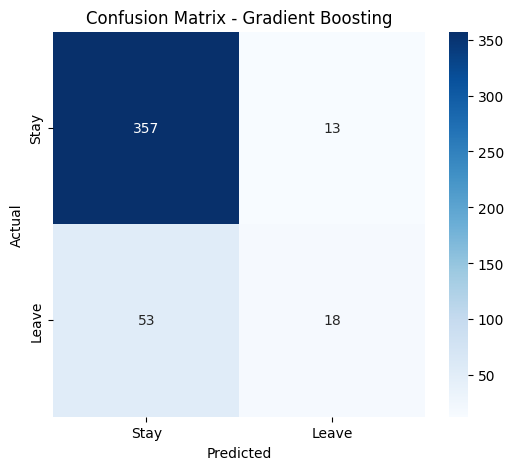

In [163]:
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

gradient_boosting_model.fit(X_train, y_train)

y_pred_gb = gradient_boosting_model.predict(X_test)
y_prob_gb = gradient_boosting_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report - Gradient Boosting :")
print(classification_report(y_test, y_pred_gb, target_names=['Stay','Leave']))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay','Leave'], yticklabels=['Stay','Leave'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

#### Model 5: XGBoost

Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       370
           1       0.53      0.30      0.38        71

    accuracy                           0.84       441
   macro avg       0.70      0.62      0.64       441
weighted avg       0.82      0.84      0.82       441



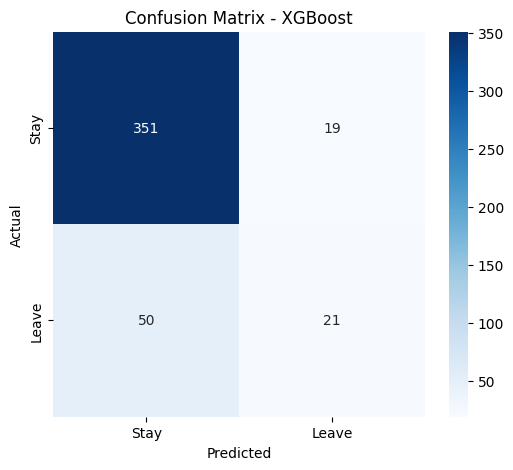

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss', scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]))

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report - XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=['Stay','Leave']))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay','Leave'], yticklabels=['Stay','Leave'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()


#### Hyperparameter Tuning with GridSearchCV - Logistic Regression

Best Parameters (Logistic Regression): {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score (F1): 0.5071652450872658
Classification Report (Tuned Logistic Regression):
              precision    recall  f1-score   support

        Stay       0.93      0.77      0.84       370
       Leave       0.37      0.70      0.48        71

    accuracy                           0.76       441
   macro avg       0.65      0.74      0.66       441
weighted avg       0.84      0.76      0.78       441



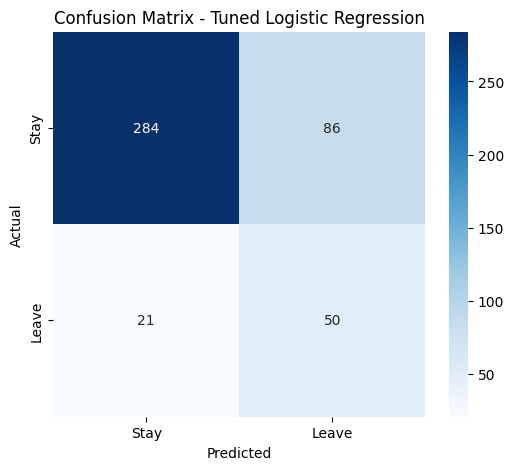

In [164]:
# --- Logistic Regression Hyperparameter Tuning ---
param_grid_lr = {
'C': [0.01, 0.1, 1, 10], # Regularization strength (inverse)
'penalty': ['l2'], # L2 regularization
'solver': ['lbfgs'] # Solver suitable for L2
}

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_lr = GridSearchCV(estimator=log_reg,
param_grid=param_grid_lr,
scoring='f1', # focus on F1 (especially for minority class)
cv=cv,
n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

print("Best Parameters (Logistic Regression):", grid_search_lr.best_params_)
print("Best CV Score (F1):", grid_search_lr.best_score_)

# Evaluate tuned model on test set
y_pred_lr_tuned = grid_search_lr.predict(X_test)
y_prob_lr_tuned = grid_search_lr.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report (Tuned Logistic Regression):")
print(classification_report(y_test, y_pred_lr_tuned, target_names=['Stay','Leave']))

# Confusion Matrix
cm_lr_tuned = confusion_matrix(y_test, y_pred_lr_tuned)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay','Leave'], yticklabels=['Stay','Leave'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.show()

#### Hyperparameter Tuning with GridSearchCV - XG Boost

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\emmaf\Documents\Bootcamp\bootcampenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:50:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters (XGBoost): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best CV Score (F1): 0.5763168602693556
Classification Report (Tuned XGBoost):
              precision    recall  f1-score   support

        Stay       0.89      0.90      0.90       370
       Leave       0.46      0.44      0.45        71

    accuracy                           0.83       441
   macro avg       0.67      0.67      0.67       441
weighted avg       0.82      0.83      0.82       441



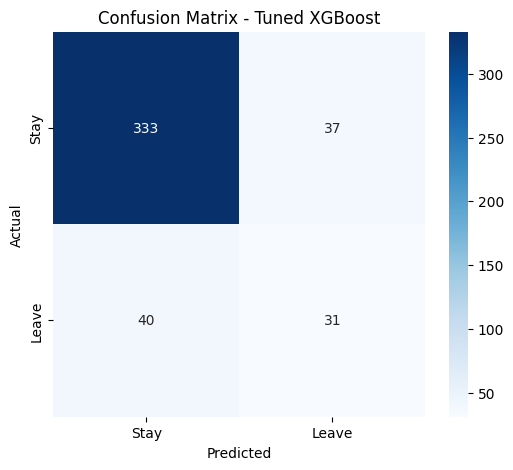

In [165]:
param_grid_xgb = {
'n_estimators': [100, 200, 300],
'max_depth': [3, 5, 7],
'learning_rate': [0.01, 0.1, 0.2],
'subsample': [0.8, 1.0],
'colsample_bytree': [0.8, 1.0]
}

xgb_clf = xgb.XGBClassifier(
random_state=42,
eval_metric='logloss',
use_label_encoder=False,
scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_xgb = GridSearchCV(estimator=xgb_clf,
param_grid=param_grid_xgb,
scoring='f1', # optimize for F1 on minority class
cv=cv,
n_jobs=-1,
verbose=1)

grid_search_xgb.fit(X_train, y_train)

print("Best Parameters (XGBoost):", grid_search_xgb.best_params_)
print("Best CV Score (F1):", grid_search_xgb.best_score_)


y_pred_xgb_tuned = grid_search_xgb.predict(X_test)
y_prob_xgb_tuned = grid_search_xgb.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report (Tuned XGBoost):")
print(classification_report(y_test, y_pred_xgb_tuned, target_names=['Stay','Leave']))

# Confusion Matrix
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay','Leave'], yticklabels=['Stay','Leave'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned XGBoost')
plt.show()

#### Model Comparison


Model Comparison Table:

                 Model  Accuracy  Precision (Leave)  Recall (Leave)  \
0  Logistic Regression  0.757370           0.367647        0.704225   
1        Decision Tree  0.793651           0.338710        0.295775   
2        Random Forest  0.841270           0.545455        0.084507   
3    Gradient Boosting  0.850340           0.580645        0.253521   
4        Tuned XGBoost  0.825397           0.455882        0.436620   

   F1 (Leave)   ROC AUC  
0    0.483092  0.814808  
1    0.315789  0.592482  
2    0.146341  0.771926  
3    0.352941  0.779330  
4    0.446043  0.725200  


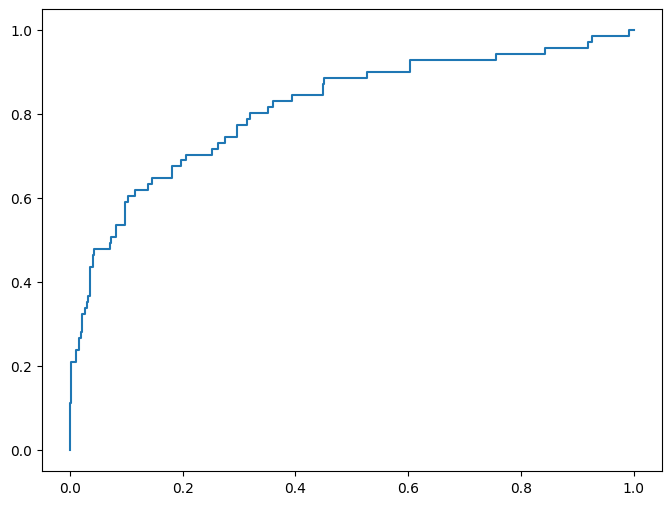

In [173]:
# Collect model results
results = []


# Logistic Regression
results.append({
'Model': 'Logistic Regression',
'Accuracy': accuracy_score(y_test, y_pred),
'Precision (Leave)': precision_score(y_test, y_pred, pos_label=1),
'Recall (Leave)': recall_score(y_test, y_pred, pos_label=1),
'F1 (Leave)': f1_score(y_test, y_pred, pos_label=1),
'ROC AUC': roc_auc_score(y_test, y_prob)
})


# Decision Tree
results.append({
'Model': 'Decision Tree',
'Accuracy': accuracy_score(y_test, y_pred_dt),
'Precision (Leave)': precision_score(y_test, y_pred_dt, pos_label=1),
'Recall (Leave)': recall_score(y_test, y_pred_dt, pos_label=1),
'F1 (Leave)': f1_score(y_test, y_pred_dt, pos_label=1),
'ROC AUC': roc_auc_score(y_test, y_prob_dt)
})


# Random Forest
results.append({
'Model': 'Random Forest',
'Accuracy': accuracy_score(y_test, y_pred_rf),
'Precision (Leave)': precision_score(y_test, y_pred_rf, pos_label=1),
'Recall (Leave)': recall_score(y_test, y_pred_rf, pos_label=1),
'F1 (Leave)': f1_score(y_test, y_pred_rf, pos_label=1),
'ROC AUC': roc_auc_score(y_test, y_prob_rf)
})


# Gradient Boosting
results.append({
'Model': 'Gradient Boosting',
'Accuracy': accuracy_score(y_test, y_pred_gb),
'Precision (Leave)': precision_score(y_test, y_pred_gb, pos_label=1),
'Recall (Leave)': recall_score(y_test, y_pred_gb, pos_label=1),
'F1 (Leave)': f1_score(y_test, y_pred_gb, pos_label=1),
'ROC AUC': roc_auc_score(y_test, y_prob_gb)
})


# XGBoost (Tuned)
results.append({
'Model': 'Tuned XGBoost',
'Accuracy': accuracy_score(y_test, y_pred_xgb_tuned),
'Precision (Leave)': precision_score(y_test, y_pred_xgb_tuned, pos_label=1),
'Recall (Leave)': recall_score(y_test, y_pred_xgb_tuned, pos_label=1),
'F1 (Leave)': f1_score(y_test, y_pred_xgb_tuned, pos_label=1),
'ROC AUC': roc_auc_score(y_test, y_prob_xgb_tuned)
})


# Convert to DataFrame
comparison_df = pd.DataFrame(results)
print("\nModel Comparison Table:\n")
print(comparison_df)


# --- ROC Curves ---
plt.figure(figsize=(8,6))


# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob):.2f})')